<a href="https://colab.research.google.com/github/Alyssa-April/Data-Science-Projects/blob/main/EDA_of_Spotify_Top_200_Charts_(2020_2021).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Exploratory Data Analysis of Spotify Top 200 Charts (2020-2021)**

##**Introduction**



###**Why Analyse Spotify's Top 200 Charts?**

<p align="justify">It is pretty obvious that for many, their lives revolve around music. People turn on their radios the moment they get in their car, listen to music during social events, while doing household chores and sometimes even while having a shower! In the earlier decades, we would be able to see people bringing around their "huge" Sony Walkmans, headphones and even tapes to play on cassette decks. What more now in the modern technological era, where music can be streamed from phones, anytime and anywhere. Music produced in the past decades can also resurface and make a comeback as apps such as TikTok, Instagram and so on use the songs as 'sounds' that sometimes can go viral. Music has brought so many benefits to humankind, helping us with anxiety, boosting our cheery moods, creating outlets for us to communicate feelings we can't say through words and the list just goes on and on. 

<p align="justify">Hailing from Sweden origins, Spotify is one of the largest music streaming applications available in the market. Even with large competitors, Spotify is able to maintain their position as one of the most used music streaming apps due to their wide range of services. With millions of songs, playlists and their wonderful song recommender system, it is no surprise that people are willing to upgrade to a premium account to enjoy their music experience to the fullest. 

<p align="justify">As music has touched our lives in one way or another, we are motivated to carry out a short Exploratory Data Analysis to gain insights on the Spotify Top 200 Charts (2020-2021). The aim is to study streaming trends, understand trending music and artists along with music characteristics that seem to capture the attention of people globally. With a better understanding of how music evolves through the streaming ecosystem, it will be easier for relevant parties to plan their marketing strategies and the type of music they should release to gain more attention.

###**Dataset**

The data used in this analysis is the Spotify Top 200 Charts (2020-2021) [dataset](https://www.kaggle.com/datasets/sashankpillai/spotify-top-200-charts-20202021) from Kaggle that was put together by Sashank Pillai. The dataset includes all 1556 songs that appear in the Top 200 Weekly (Global) charts of Spotify in the year 2020 and 2021. The coverage date for the data is from 31 December 2019 to 11 August 2021, a total of 84 weeks. The author scraped the data from spotifycharts.com, BeautifulSoup and Spotipy Python library. [spotifycharts.com](https://spotifycharts.com) generates the top songs based on context from user playlists and editorial feedback. This Spotify dataset includes the following variables:

| Variable                 | Description |
|----------                |:-------------|
|Highest Charting Position | The highest position that the song has been in the Spotify Top 200 Weekly Global Charts in 2020 and 2021 |
|Number of Times Charted   | The number of times that the song has been in the Spotify Top 200 Weekly Global Charts in 2020 and 2021 |
| Week of Highest Charting | The week the song had the highest position in the Spotify Top 200 Weekly Global Charts in 2020 and 2021 |
| Song Name                | The name of the song     |
|Song iD                   | The song ID provided by Spotify, which is unique to each song |
|Streams                   | Approximate number of streams the song has |
| Artist                   | The main artist/artists involved in making the song |
|Artist Followers          | The number of followers the main artist has on Spotify |
|Genre                     | Genre of the song |
|Release Date              | The initial date that the song was released |
|Weeks Charted             | The weeks that the song has been on the Spotify Top 200 Weekly Global Charts in 2020 and 2021 |
|Popularity                | The popularity of the track with values between 0 and 100, where value of 100 is the most popular |
|Danceability              | Describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable. |
|Acousticness             | A measure from 0.0 to 1.0 of whether the track is acoustic|
|Energy                   | Energy is a measure from 0.0 to 1.0 that represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.|
|Liveness                 | Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. |
|Loudness                 | The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track. Values typically range between -60 and 0 db. |
|Speechiness              | Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. |
| Tempo                   | The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration. |
|Valence                  | A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry). |
|Chord                    | Main chord of the song instrumental |
|Duration (ms)            | Duration of the track in milliseconds |


##**Read in and Clean Data to be Used in Analysis**

Before any complex or even simple analysis is done on a dataset, the data needs to be cleaned to ensure errors are removed and poor quality results are avoided.

In [ ]:
# import the library that need to be used for data manipulation and visualisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# mount drive so that the dataset can be read into the notebook more easily
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<p align="justify">Firstly, download the dataset from Kaggle in csv format to your local file. Then, upload the file to Google Drive. Once drive has been mounted as shown in the step above, get the path of your file and change the path below to your file path. The dataset is then read into Colab. 

Observe that there are 1556 observations with 23 variables/columns including an 'Index' column.

In [ ]:
# read in dataset
raw_data = pd.read_csv('/content/drive/MyDrive/Data_Science/Project_2/spotify_dataset.csv')
raw_data

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],...,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],...,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",...,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",...,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,1552,195,1,2019-12-27--2020-01-03,New Rules,"4,630,675",Dua Lipa,27167675,2ekn2ttSfGqwhhate0LSR0,"['dance pop', 'pop', 'uk pop']",...,0.762,0.7,-6.021,0.0694,0.00261,0.153,116.073,209320,0.608,A
1552,1553,196,1,2019-12-27--2020-01-03,Cheirosa - Ao Vivo,"4,623,030",Jorge & Mateus,15019109,2PWjKmjyTZeDpmOUa3a5da,"['sertanejo', 'sertanejo universitario']",...,0.528,0.87,-3.123,0.0851,0.24,0.333,152.37,181930,0.714,B
1553,1554,197,1,2019-12-27--2020-01-03,Havana (feat. Young Thug),"4,620,876",Camila Cabello,22698747,1rfofaqEpACxVEHIZBJe6W,"['dance pop', 'electropop', 'pop', 'post-teen ...",...,0.765,0.523,-4.333,0.03,0.184,0.132,104.988,217307,0.394,D
1554,1555,198,1,2019-12-27--2020-01-03,Surtada - Remix Brega Funk,"4,607,385","Dadá Boladão, Tati Zaqui, OIK",208630,5F8ffc8KWKNawllr5WsW0r,"['brega funk', 'funk carioca']",...,0.832,0.55,-7.026,0.0587,0.249,0.182,154.064,152784,0.881,F


In [ ]:
# Check if there is any missing data. 
# Notice that there are no missing values.
pd.isnull(raw_data).sum()

Index                        0
Highest Charting Position    0
Number of Times Charted      0
Week of Highest Charting     0
Song Name                    0
Streams                      0
Artist                       0
Artist Followers             0
Song ID                      0
Genre                        0
Release Date                 0
Weeks Charted                0
Popularity                   0
Danceability                 0
Energy                       0
Loudness                     0
Speechiness                  0
Acousticness                 0
Liveness                     0
Tempo                        0
Duration (ms)                0
Valence                      0
Chord                        0
dtype: int64

In [ ]:
# Something is not right. The data type for the numeric variables are treated as objects.
# Further inspection must be done. 
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Index                      1556 non-null   int64 
 1   Highest Charting Position  1556 non-null   int64 
 2   Number of Times Charted    1556 non-null   int64 
 3   Week of Highest Charting   1556 non-null   object
 4   Song Name                  1556 non-null   object
 5   Streams                    1556 non-null   object
 6   Artist                     1556 non-null   object
 7   Artist Followers           1556 non-null   object
 8   Song ID                    1556 non-null   object
 9   Genre                      1556 non-null   object
 10  Release Date               1556 non-null   object
 11  Weeks Charted              1556 non-null   object
 12  Popularity                 1556 non-null   object
 13  Danceability               1556 non-null   object
 14  Energy  

<p align="justify">After looking through the dataset more thoroughly, it has been noticed that some obervations have a space to indicate missing values instead of NA. This was the reason no missing values were detected earlier besides the data type of the variables being mixed up. Therefore, the code below strips all leading and trailing spaces in a string, leaving the missing values with just "". The following code then replaces all "" with the NA value to indicate rows with missing values.

In [ ]:
for col in raw_data.columns:
    # check if the columns contain any string data
    # strip leading and trailing spaces of the strings (empty spaces will be stripped too)
    if pd.api.types.is_string_dtype(raw_data[col]):
        raw_data[col] = raw_data[col].str.strip()

In [ ]:
# replace the empty values with NA
raw_data = raw_data.replace({"":np.nan})

<p align="justify">Another thing that seems out of place is that the 'Streams' column is an object instead of an integer. Notice below that there are commas in between the digits, causing them to not be numerics. The following code then replaces these commas in the 'Streams' column with an empty character.

In [ ]:
# there are commas in between digits
raw_data['Streams'].head()

0    48,633,449
1    47,248,719
2    40,162,559
3    37,799,456
4    33,948,454
Name: Streams, dtype: object

In [ ]:
# replace the commas with empty character
raw_data['Streams'] = raw_data['Streams'].str.replace(',', '')

In [ ]:
# there are no more commas in between the digits now
raw_data['Streams'].head()

0    48633449
1    47248719
2    40162559
3    37799456
4    33948454
Name: Streams, dtype: object

In [ ]:
# there are now 11 rows with missing values for certain variables
pd.isnull(raw_data).sum()

Index                         0
Highest Charting Position     0
Number of Times Charted       0
Week of Highest Charting      0
Song Name                     0
Streams                       0
Artist                        0
Artist Followers             11
Song ID                      11
Genre                        11
Release Date                 11
Weeks Charted                 0
Popularity                   11
Danceability                 11
Energy                       11
Loudness                     11
Speechiness                  11
Acousticness                 11
Liveness                     11
Tempo                        11
Duration (ms)                11
Valence                      11
Chord                        11
dtype: int64

In [ ]:
# Drop all the rows with missing values.
# Now, there are no more rows with missing values.
raw_data = raw_data.dropna()
pd.isnull(raw_data).sum()

Index                        0
Highest Charting Position    0
Number of Times Charted      0
Week of Highest Charting     0
Song Name                    0
Streams                      0
Artist                       0
Artist Followers             0
Song ID                      0
Genre                        0
Release Date                 0
Weeks Charted                0
Popularity                   0
Danceability                 0
Energy                       0
Loudness                     0
Speechiness                  0
Acousticness                 0
Liveness                     0
Tempo                        0
Duration (ms)                0
Valence                      0
Chord                        0
dtype: int64

In [ ]:
# the data type of the variables are still incorrect since there were already read in incorrectly earlier 
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1545 entries, 0 to 1555
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Index                      1545 non-null   int64 
 1   Highest Charting Position  1545 non-null   int64 
 2   Number of Times Charted    1545 non-null   int64 
 3   Week of Highest Charting   1545 non-null   object
 4   Song Name                  1545 non-null   object
 5   Streams                    1545 non-null   object
 6   Artist                     1545 non-null   object
 7   Artist Followers           1545 non-null   object
 8   Song ID                    1545 non-null   object
 9   Genre                      1545 non-null   object
 10  Release Date               1545 non-null   object
 11  Weeks Charted              1545 non-null   object
 12  Popularity                 1545 non-null   object
 13  Danceability               1545 non-null   object
 14  Energy  

<p align="justify">Instead of manually converting the data types of the variables, an easy workaround would be to write a new csv file to your drive and then re-read it back into the notebook. Since all the values were already fixed by removing the NA's and unnecessary commas, reading in the new csv file would give us the right data types. The correct data types will make analysis easier. 

In [ ]:
# write the updated file to the same folder where the original dataset was saved
path = '/content/drive/MyDrive/Data_Science/Project_2/spotify_dataset_clean.csv'
with open(path, 'w', encoding = 'utf-8-sig') as f:
  raw_data.to_csv(f)

In [ ]:
# read in the updated file
dataset = pd.read_csv('/content/drive/MyDrive/Data_Science/Project_2/spotify_dataset_clean.csv')
dataset

,Unnamed: 0,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,0,1,1,8,2021-07-23--2021-07-30,Beggin',48633449,Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,...,0.714,0.800,-4.808,0.0504,0.12700,0.3590,134.002,211560,0.589,B
1,1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),47248719,The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,...,0.591,0.764,-5.484,0.0483,0.03830,0.1030,169.928,141806,0.478,C#/Db
2,2,3,1,11,2021-06-25--2021-07-02,good 4 u,40162559,Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,...,0.563,0.664,-5.044,0.1540,0.33500,0.0849,166.928,178147,0.688,A
3,3,4,3,5,2021-07-02--2021-07-09,Bad Habits,37799456,Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,...,0.808,0.897,-3.712,0.0348,0.04690,0.3640,126.026,231041,0.591,B
4,4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),33948454,Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,...,0.736,0.704,-7.409,0.0615,0.02030,0.0501,149.995,212000,0.894,D#/Eb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1540,1551,1552,195,1,2019-12-27--2020-01-03,New Rules,4630675,Dua Lipa,27167675,2ekn2ttSfGqwhhate0LSR0,...,0.762,0.700,-6.021,0.0694,0.00261,0.1530,116.073,209320,0.608,A
1541,1552,1553,196,1,2019-12-27--2020-01-03,Cheirosa - Ao Vivo,4623030,Jorge & Mateus,15019109,2PWjKmjyTZeDpmOUa3a5da,...,0.528,0.870,-3.123,0.0851,0.24000,0.3330,152.370,181930,0.714,B
1542,1553,1554,197,1,2019-12-27--2020-01-03,Havana (feat. Young Thug),4620876,Camila Cabello,22698747,1rfofaqEpACxVEHIZBJe6W,...,0.765,0.523,-4.333,0.0300,0.18400,0.1320,104.988,217307,0.394,D
1543,1554,1555,198,1,2019-12-27--2020-01-03,Surtada - Remix Brega Funk,4607385,"Dadá Boladão, Tati Zaqui, OIK",208630,5F8ffc8KWKNawllr5WsW0r,...,0.832,0.550,-7.026,0.0587,0.24900,0.1820,154.064,152784,0.881,F


In [ ]:
# When writing the new file, another column for index was introduced.
# Simply drop this column as it is redundant. 
dataset = dataset.iloc[: , 1:]
dataset

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',48633449,Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",...,0.714,0.800,-4.808,0.0504,0.12700,0.3590,134.002,211560,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),47248719,The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],...,0.591,0.764,-5.484,0.0483,0.03830,0.1030,169.928,141806,0.478,C#/Db
2,3,1,11,2021-06-25--2021-07-02,good 4 u,40162559,Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],...,0.563,0.664,-5.044,0.1540,0.33500,0.0849,166.928,178147,0.688,A
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,37799456,Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",...,0.808,0.897,-3.712,0.0348,0.04690,0.3640,126.026,231041,0.591,B
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),33948454,Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",...,0.736,0.704,-7.409,0.0615,0.02030,0.0501,149.995,212000,0.894,D#/Eb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1540,1552,195,1,2019-12-27--2020-01-03,New Rules,4630675,Dua Lipa,27167675,2ekn2ttSfGqwhhate0LSR0,"['dance pop', 'pop', 'uk pop']",...,0.762,0.700,-6.021,0.0694,0.00261,0.1530,116.073,209320,0.608,A
1541,1553,196,1,2019-12-27--2020-01-03,Cheirosa - Ao Vivo,4623030,Jorge & Mateus,15019109,2PWjKmjyTZeDpmOUa3a5da,"['sertanejo', 'sertanejo universitario']",...,0.528,0.870,-3.123,0.0851,0.24000,0.3330,152.370,181930,0.714,B
1542,1554,197,1,2019-12-27--2020-01-03,Havana (feat. Young Thug),4620876,Camila Cabello,22698747,1rfofaqEpACxVEHIZBJe6W,"['dance pop', 'electropop', 'pop', 'post-teen ...",...,0.765,0.523,-4.333,0.0300,0.18400,0.1320,104.988,217307,0.394,D
1543,1555,198,1,2019-12-27--2020-01-03,Surtada - Remix Brega Funk,4607385,"Dadá Boladão, Tati Zaqui, OIK",208630,5F8ffc8KWKNawllr5WsW0r,"['brega funk', 'funk carioca']",...,0.832,0.550,-7.026,0.0587,0.24900,0.1820,154.064,152784,0.881,F


In [ ]:
# Observe that the variables all have the appropriate data type now.
# This is the final dataset that will be used for EDA.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1545 entries, 0 to 1544
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Index                      1545 non-null   int64  
 1   Highest Charting Position  1545 non-null   int64  
 2   Number of Times Charted    1545 non-null   int64  
 3   Week of Highest Charting   1545 non-null   object 
 4   Song Name                  1545 non-null   object 
 5   Streams                    1545 non-null   int64  
 6   Artist                     1545 non-null   object 
 7   Artist Followers           1545 non-null   int64  
 8   Song ID                    1545 non-null   object 
 9   Genre                      1545 non-null   object 
 10  Release Date               1545 non-null   object 
 11  Weeks Charted              1545 non-null   object 
 12  Popularity                 1545 non-null   int64  
 13  Danceability               1545 non-null   float

The final dataset to be used in analysis has 1545 observations.

##**Results and Discussion**

###**Visualisation 1**

<p align="justify">For the first visualisation, we would like to observe the total number of streams received by all the songs in the Top 200 Charts over time. The time points are taken as the start date of each song's 'Week of Highest Charting' range of dates. Thus, the 'Week of Highest Charting' column is split into two new columns named, 'Start Date' and 'End Date'. The dataframe is then grouped by the 'Start Date' and then the sum of 'Streams' for each group is obtained. A lineplot is plotted to see if there are any patterns in the number of streams over time.

<p align="justify">Note that a song that has been listened to for at least 30 seconds is considered as a single stream. If the song is replayed and it passes 30 seconds, it is considered as another stream. 

In [ ]:
# split the 'Week of Highest Charting' into two new columns, 'Start date' and 'End Date'
data1 = dataset
data1[['Start Date', 'End Date']] = data1['Week of Highest Charting'].str.split("--", expand = True)
data1

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord,Start Date,End Date
0,1,1,8,2021-07-23--2021-07-30,Beggin',48633449,Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",...,-4.808,0.0504,0.12700,0.3590,134.002,211560,0.589,B,2021-07-23,2021-07-30
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),47248719,The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],...,-5.484,0.0483,0.03830,0.1030,169.928,141806,0.478,C#/Db,2021-07-23,2021-07-30
2,3,1,11,2021-06-25--2021-07-02,good 4 u,40162559,Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],...,-5.044,0.1540,0.33500,0.0849,166.928,178147,0.688,A,2021-06-25,2021-07-02
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,37799456,Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",...,-3.712,0.0348,0.04690,0.3640,126.026,231041,0.591,B,2021-07-02,2021-07-09
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),33948454,Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",...,-7.409,0.0615,0.02030,0.0501,149.995,212000,0.894,D#/Eb,2021-07-23,2021-07-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1540,1552,195,1,2019-12-27--2020-01-03,New Rules,4630675,Dua Lipa,27167675,2ekn2ttSfGqwhhate0LSR0,"['dance pop', 'pop', 'uk pop']",...,-6.021,0.0694,0.00261,0.1530,116.073,209320,0.608,A,2019-12-27,2020-01-03
1541,1553,196,1,2019-12-27--2020-01-03,Cheirosa - Ao Vivo,4623030,Jorge & Mateus,15019109,2PWjKmjyTZeDpmOUa3a5da,"['sertanejo', 'sertanejo universitario']",...,-3.123,0.0851,0.24000,0.3330,152.370,181930,0.714,B,2019-12-27,2020-01-03
1542,1554,197,1,2019-12-27--2020-01-03,Havana (feat. Young Thug),4620876,Camila Cabello,22698747,1rfofaqEpACxVEHIZBJe6W,"['dance pop', 'electropop', 'pop', 'post-teen ...",...,-4.333,0.0300,0.18400,0.1320,104.988,217307,0.394,D,2019-12-27,2020-01-03
1543,1555,198,1,2019-12-27--2020-01-03,Surtada - Remix Brega Funk,4607385,"Dadá Boladão, Tati Zaqui, OIK",208630,5F8ffc8KWKNawllr5WsW0r,"['brega funk', 'funk carioca']",...,-7.026,0.0587,0.24900,0.1820,154.064,152784,0.881,F,2019-12-27,2020-01-03


In [ ]:
# group the dataframe by the 'Start Date' and find the sum of 'Streams' in each date
data1 = data1.groupby(data1['Start Date'])['Streams'].sum()
data1

Start Date
2019-12-27    456689174
2020-01-03    247885400
2020-01-10    121479473
2020-01-17    276248196
2020-01-24     92478119
                ...    
2021-06-25    217137755
2021-07-02    228356940
2021-07-09     94781936
2021-07-16    101434628
2021-07-23    471626313
Name: Streams, Length: 83, dtype: int64

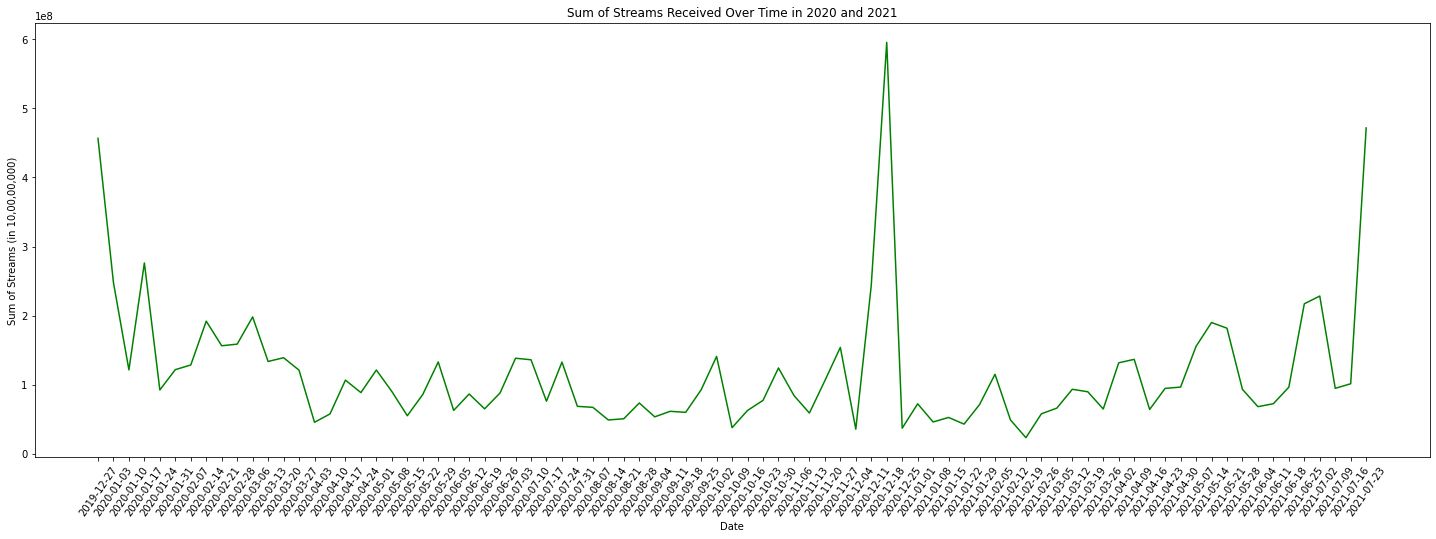

In [ ]:
# plot the first visualisation using seaborn and matplotlib functions
plt.figure(figsize=(25,8))
fig_1 = sns.lineplot(data = data1, color = 'green')
fig_1.set(ylabel = 'Sum of Streams (in 10,00,00,000)', xlabel = 'Date', title = 'Sum of Streams Received Over Time in 2020 and 2021')
plt.xticks(rotation=55);

From the figure above, the number of streams does seem to show some seasonality where they increase and decrease in somewhat regular periods over time. If you notice, all the dates listed are actually Fridays, due to the fact that the music industry's release day for new music is on Fridays, globally. Before 2015, different countries would have different release days for new music, leading to piracy issues. This is because people who get to stream the songs earlier would upload them online, and thus those still waiting wouldn't bother to stream or wait for the release in their countries anymore since it is already online. Besides that, charting potential is tracked from Fridays to Thursdays. Therefore, new releases on Friday would be able to maximise their charting position as their streams and sales are tracked over the whole week. The fact that Beyonce’s surprise album release on a Friday managed to thrive remarkably, also pushed the idea forward, as explained in this [article](https://www.billboard.com/pro/friday-global-record-release-day-ifpi/). 

<p align="justify">On certain Fridays there are spikes, most probably because more new music releases were done that week. Besides that, a more anticipated release by well-known artists such as an album drop could have taken place. This explains the spikes as more people stream these anticipated releases on those particular weeks. Also worth noting, extreme spikes in the number of streams are observed in the December months. This does not come as a surprise as it is the holiday season, especially Christmas. Every December, malls, radio stations and places everywhere would play Christmas songs, which then leads to people looking up those songs on their streaming services. Many people worldwide stream Christmas songs excessively during this period of time, introducing the spikes in the number of streams in December. The table in the next cell block lists songs with the word 'Christmas' in the 'Song 'Name'. Notice that their 'Weeks Charted' are mostly in December. 

<p align="justify">Lastly, it is inferred that the spike on 23 July 2023 could be partly due to Lil Nas X and Camila Cabello releasing their new songs on that day. These songs titled 'INDUSTRY BABY' and 'Don't Go Yet' have received 33,948,454 and 13,205,250 streams respectively. 'INDUSTRY BABY' was a highly anticipated song release because of the controversies surrounding Lil Nas X's lawsuit. He made a statement claiming that the lawsuit could lead him going to jail. However, he later released a teaser for the 'INDUSTRY BABY' music video that made fun of the lawsuit, gaining the attention of many in waiting for the song's release. 

<p align="justify">All in all, excellent promotion of an upcoming song release could lead to a high number of streams in a particular week, especially if many good songs were released on the same day. The strategies used to promote song releases are an important factor in determining the success of a song. Holiday seasons also play an important role in making holiday songs reappear in the charts. 

In [ ]:
# Songs with the word 'Christmas' in it along with the weeks they were charted.
# Mostly are charted in December, simple explanation for the spikes in December
data_christmas = dataset[dataset['Song Name'].str.contains('Christmas')]
data_christmas.loc[:, ['Song Name', 'Weeks Charted']]

,Song Name,Weeks Charted
615,All I Want for Christmas Is You,2020-12-25--2021-01-01\n2020-12-18--2020-12-25...
616,Last Christmas,2020-12-25--2021-01-01\n2020-12-18--2020-12-25...
618,Rockin' Around The Christmas Tree,2020-12-25--2021-01-01\n2020-12-18--2020-12-25...
620,It's Beginning to Look a Lot like Christmas,2020-12-25--2021-01-01\n2020-12-18--2020-12-25...
628,Do They Know It's Christmas? - 1984 Version,2020-12-25--2021-01-01\n2020-12-18--2020-12-25...
629,Wonderful Christmastime - Edited Version / Rem...,2020-12-25--2021-01-01\n2020-12-18--2020-12-25...
630,Holly Jolly Christmas,2020-12-25--2021-01-01\n2020-12-18--2020-12-25...
632,The Christmas Song (Merry Christmas To You),2020-12-25--2021-01-01\n2020-12-18--2020-12-25...
633,White Christmas,2020-12-25--2021-01-01\n2020-12-18--2020-12-25...
635,A Holly Jolly Christmas - Single Version,2020-12-25--2021-01-01\n2020-12-18--2020-12-25...


###**Visualisation 2**

<p align="justify">In this second visualisation, the average streams for songs based on their highest charting position in the Top 200 Charts are observed. The dataset is first grouped by the 'Highest Charting Position' before computing the mean of 'Streams'. A lineplot is then plotted to view the behaviour of average streams. 

In [ ]:
# group the dataframe by the 'Highest Charting Position' and find the mean of 'Streams' for each charting position
data2 = dataset['Streams'].groupby(dataset['Highest Charting Position']).mean()
data2

Highest Charting Position
1      1.485672e+07
2      1.142681e+07
3      1.507478e+07
4      6.971674e+06
5      1.003923e+07
           ...     
196    4.620074e+06
197    4.943611e+06
198    4.892155e+06
199    4.827047e+06
200    5.032682e+06
Name: Streams, Length: 200, dtype: float64

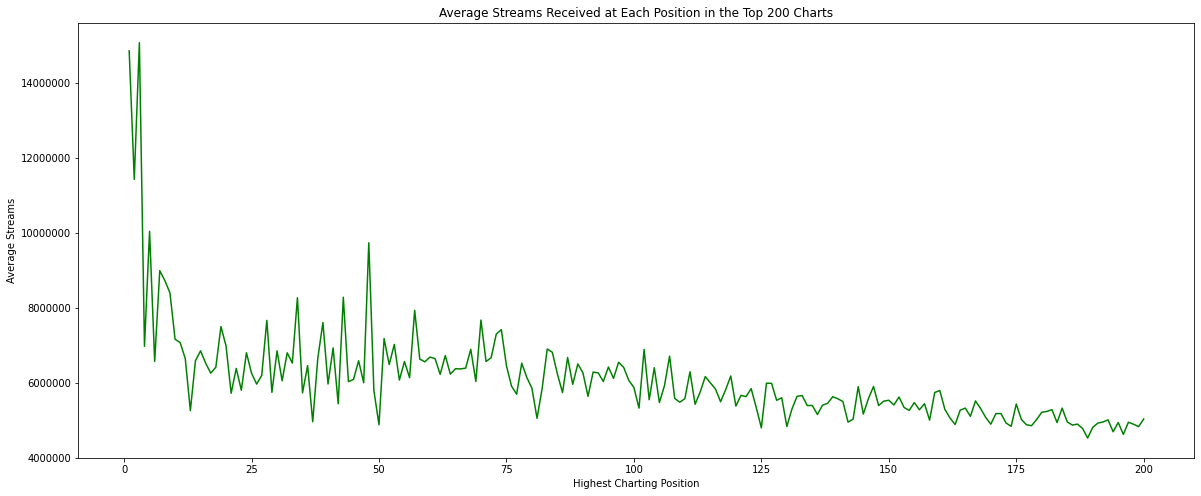

In [ ]:
# plot the second visualisation
plt.figure(figsize=(20,8))
fig_2 = sns.lineplot(data = data2, color = 'green')
fig_2.set(ylabel = 'Average Streams', title = 'Average Streams Received at Each Position in the Top 200 Charts')
plt.ticklabel_format(style='plain');

<p align="justify">Through the figure above, we are able to assess the popularity of songs in terms of streams based on their charting positions. Here we can study how charting positions compare to one another. Is being ranked number 1 and 2 the same as being ranked number 199 and 200? One might think that as long as a song is charted in the Top 200, they are all on par. However, the figure proves the assumption wrong. 

<p align="justify">There is much more prestige in being charted in the first Top 5 than being charted in positions lower than that. The magnitude of average streams for the first five highest charting positions are much more higher than the positions after that. Here the decrease in the first few positions are much more extreme as the drop from first position to second position is a lot higher than the drop from let's say the 185th to 186th spot. An example would be, the 1st spot and 20th spot have a difference in average streams of 7,877,255 but the difference between the 181st and 200th spot is only 200,338. Songs would need much more streams to move up 19 spots from a position of 20 to 1 than from 200 to 181. Thus, going from the 200th to 181st spot might not be that big of a deal for some.

<p align="justify">The values follow a power law distribution that can be seen in many real systems. Here songs in the top few spots have a very high average number of streams, but songs in many other lower spots have low average streams. The rich get richer phenomenon can also explain the results obtained. It is clearly obvious that songs in the first few top spots gain more exposure and thus would receive even more streams. Even when we view the charts, we would only view the first few without really bothering about songs at the bottom. 

<p align="justify">Based on the table in the next cell block, only 18 songs made it to the highest charting position of 1. Most of the songs are pop songs, indicating that the current generation highly values the pop genre. Olivia Rodrigo, a 20 year old American singer-songwriter, has two songs reaching the first spot, namely 'good 4 u' and 'drivers license'. Her debut studio album, 'Sour', was released on 21 May 2021, winning many awards. Also, 'Beggin'' was a song by The Four Seasons in 1967, but its currently topping the charts due to a cover by Maneskin. The song also gained popularity due to it trending and going viral on TikTok. Music is timeless as even old songs can resurface. The power of social media in determining the success of songs can be huge. 

<p align="justify">To conlude this subsection, the results show that it is much more remarkable for a song to make it to position number 1 than it is to be in position 20. To be the biggest of the biggest hits, a song would need streams in numbers that are orders of magnitude higher. Being a top ranked song is a huge success for artists as it will be easier for their songs to gain popularity. This will also be demonstrated in the Visualisation 5 section.

In [ ]:
# songs that reach the 'Highest Charting Position' of 1
top_1 = dataset[dataset['Highest Charting Position'] == 1].loc[:, ['Song Name', 'Artist', 'Streams', 'Genre']]
top_1

,Song Name,Artist,Streams,Genre
0,Beggin',Måneskin,48633449,"['indie rock italiano', 'italian pop']"
2,good 4 u,Olivia Rodrigo,40162559,['pop']
5,MONTERO (Call Me By Your Name),Lil Nas X,30071134,"['lgbtq+ hip hop', 'pop rap']"
13,Peaches (feat. Daniel Caesar & Giveon),Justin Bieber,20294457,"['canadian pop', 'pop', 'post-teen pop']"
22,drivers license,Olivia Rodrigo,15684978,['pop']
24,Blinding Lights,The Weeknd,15011809,"['canadian contemporary r&b', 'canadian pop', ..."
38,DÁKITI,"Bad Bunny, Jhay Cortez",11524288,"['latin', 'reggaeton', 'trap latino']"
45,Mood (feat. iann dior),24kGoldn,10222056,['cali rap']
78,Dance Monkey,Tones And I,7687058,"['australian pop', 'pop']"
90,positions,Ariana Grande,7244853,"['dance pop', 'pop', 'post-teen pop']"


###**Visualisation 3**

<p align="justify">Next we move on to the third visualisation, where for each number of weeks being charted in the Top 200, we view how many songs are associated with them. First of all, we should know that the 'Number of Times Charted' column is actually the number of weeks the songs appear on the charts. So, the dataset is grouped by the 'Number of Times Charted' and then the number of songs for each group is counted. A barplot is plotted to observe their relationship.

<p align="justify">As an example, if a song's number of weeks charted is only 1, it means that the song has entered and left the charts very quickly since it was only on there for a week. 

<p align="justify">Note that for this section, a little data manipulation is done since there are duplicate dates. The reason for this and the steps taken are explained throughout this section.

In [ ]:
# Group the dataset by their 'Number of Times Charted' and get the counts.
# Since all the columns give the same values, subset only the index column and turn it into a dataframe.
# Rename the column 'Index' as 'Number of Songs'
# Rename the index of the dataframe as 'Number of Weeks Charted'
data3 = dataset.groupby(dataset['Number of Times Charted']).count()
data3 = pd.DataFrame(no_of_weeks['Index'])
data3.columns.values[0] = 'Number of Songs'
data3.index.name='Number of Weeks Charted'
data3

,Number of Songs
Number of Weeks Charted,
1,504
2,149
3,110
4,76
5,70
...,...
81,2
82,2
83,18


<p align="justify">From the dataframe above, we notice that there is an outlier, a song that is charted for 142 weeks. This is not possible since the coverage for the dataset is only 84 weeks. Thus, the code in the next cell block checks which song has this unexpected data. It turns out, the song titled 'Falling' by Harry Styles, a 29 year old English singer-songwriter, is the one being charted for 142 weeks. After further observation, it is found that the 'Weeks Charted' column for this song has a majority of dates that are written twice. The song is actually supposed to be charted for only 73 weeks. 

<p align="justify">Therefore, the code that follows, checks for how many songs are charted for 73 weeks, but there are none. Firstly, the last row with 142 weeks is removed from the dataframe and then a new row with 'Number of Weeks Charted' equals to 73 and 'Number of Songs' equals to 1 is appended to the dataframe. The dataframe now contains all the correct number of weeks.

**Important note: The 'Falling' song is not removed from the dataset. There is no need to worry about this song affecting the other values or analyses carried out. This is because only the duplicates in the 'Weeks Charted' column has caused the 'Number of Times Charted' to be recorded wrongly for this song. The other values for this song are all accurate and has no impact on other songs. If we were to remove this song, it would make the other analyses incorrect as the values for 'Falling' will not be taken into consideration.**

In [ ]:
# Search which song is charted for 142 weeks.
dataset[dataset['Number of Times Charted'] == 142]

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord,Start Date,End Date
366,369,5,142,2019-12-27--2020-01-03,Falling,5294368,Harry Styles,16112621,1ZMiCix7XSAbfAJlEZWMCp,"['pop', 'post-teen pop']",...,-6.502,0.0299,0.839,0.089,110.011,240133,0.0592,E,2019-12-27,2020-01-03


In [ ]:
# observe that that is no 'Number of Weeks Charted' == 73 
data3.tail(12)

,Number of Songs
Number of Weeks Charted,
71,1
72,2
74,1
76,1
77,1
78,3
80,1
81,2
82,2


In [ ]:
# Remove the last row with 142 weeks.
# Add a new row of 73 weeks with 1 count (song called 'Falling')
# Sort the dataframe in ascending order by the 'Number of Weeks Charted'
# Observe that 'Number of Weeks Charted' == 73 is now available
data3 = data3.iloc[0:74, :]
new_row = pd.Series({'Number of Songs': 1}, name = 73)
data3 = data3.append(new_row)
data3 = data3.sort_index(ascending=True)
data3.tail(12)

,Number of Songs
Number of Weeks Charted,
71,1
72,2
73,1
74,1
76,1
77,1
78,3
80,1
81,2


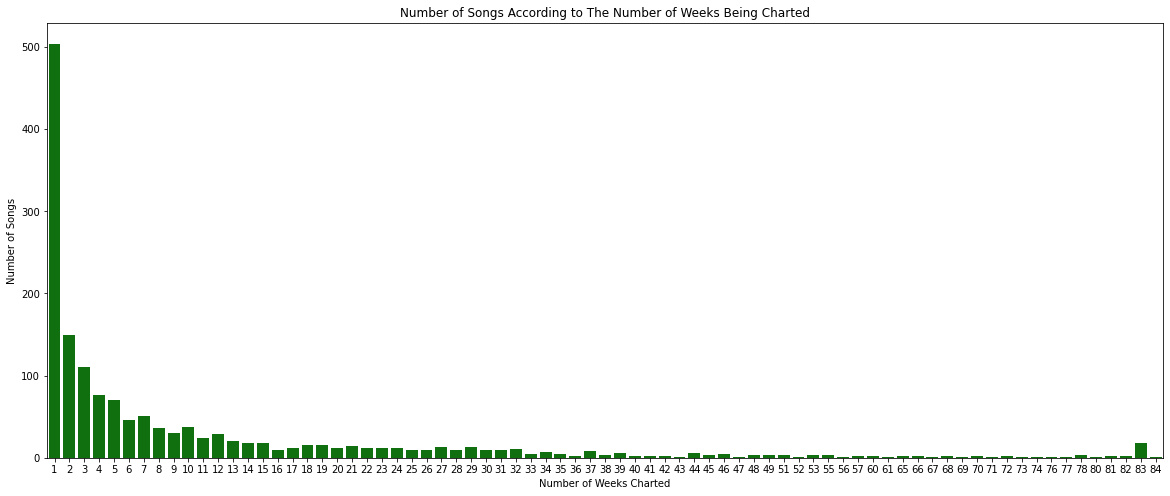

In [ ]:
# plot the third visualisation
plt.figure(figsize=(20,8))
fig_3 = sns.barplot(data = data3, x = data3.index, y = 'Number of Songs', color = 'green')
fig_3.set(title = 'Number of Songs According to The Number of Weeks Being Charted');

<p align="justify">As expected, the distribution in the barplot above also follows somewhat of a power law. The power law distribution is sometimes associated with the 80/20 rule coined by Vilfredo Pareto. Here, there are many songs with a small number of weeks charted, but not that many songs with a high number of weeks charted. Songs with a high number of weeks charted can be said to monopoly the charts as they stay on the charts for a much longer time than the other songs. But of course, it also depends on their ranking. To be exact, 909 out of 1545 or
58.83% of songs are only charted for 5 weeks or less. On the other hand, only 1.49% of songs are are charted for 81 to 84 weeks. 21% of the songs are charted for more than 15 weeks.

<p align="justify">There is one song that stayed on the charts for the whole 84 weeks of data coverage. Based on the code in the next cell block, this song is called 'Circles' by Post Malone, a 28 year old American rapper. This song's highest charting position was the 6th spot, indicating that even though it stayed on the charts for a long time, it never reached the highest spot. Also, the song has 7,156,162 streams, which might mean that  although it stayed on the charts for a long time, it could have been charted at lower positions. By obtaining a dataset that covers a longer time period, we can determine if 'Circles' actually stayed on the charts for longer than 84 weeks or not. 

<p align="justify">The barplot above is important because it shows us that even though a song appears in the Top 200, it could be that the song only lasts for a short while, or even if it lasts a long time, it might not be the biggest hit. Many songs can be charted on the Top 200 but a more in depth analysis could show us how big of a hit it was. 

![picture](https://drive.google.com/uc?export=view&id=1yfxa6mEEtDzz7MDzXH7So7oMAFGIWz06)


In [ ]:
# search for the song that stayed on the charts for all 84 weeks
dataset[dataset['Number of Times Charted'] == 84]

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord,Start Date,End Date
91,93,6,84,2019-12-27--2020-01-03,Circles,7156162,Post Malone,33651775,21jGcNKet2qwijlDFuPiPb,"['dfw rap', 'melodic rap', 'rap']",...,-3.497,0.0395,0.192,0.0863,120.042,215280,0.553,C,2019-12-27,2020-01-03


###**Visualisation 4**

<p align="justify">In this section, a few subplots of histograms are plotted to observe the distribution of the characteristics of songs appearing in the Top 200 Charts. First of all, the desired characteristics/variables are subset. Following this, one histogram is plotted for each variable using the for loop.

Note that the explanations of each variable can be found in the Data subsection under the Introduction.

In [ ]:
# subset the desired variables
data4 = dataset.loc[:, ['Danceability', 'Energy', 'Loudness', 'Speechiness',
                            'Acousticness', 'Liveness', 'Tempo', 'Duration (ms)', 'Valence']]

In [ ]:
# descriptive statistics for each variable
data4.describe()

,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence
count,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000
mean,0.689997,0.633495,-6.348474,0.123656,0.248695,0.181202,122.811023,197940.816828,0.514704
std,0.142444,0.161577,2.509281,0.110383,0.250326,0.144071,29.591088,47148.930420,0.227326
min,0.150000,0.054000,-25.166000,0.023200,0.000025,0.019700,46.718000,30133.000000,0.032000
25%,0.599000,0.532000,-7.491000,0.045600,0.048500,0.096600,97.960000,169266.000000,0.343000
50%,0.707000,0.642000,-5.990000,0.076500,0.161000,0.124000,122.012000,193591.000000,0.512000
75%,0.796000,0.752000,-4.711000,0.165000,0.388000,0.217000,143.860000,218902.000000,0.691000
max,0.980000,0.970000,1.509000,0.884000,0.994000,0.962000,205.272000,588139.000000,0.979000


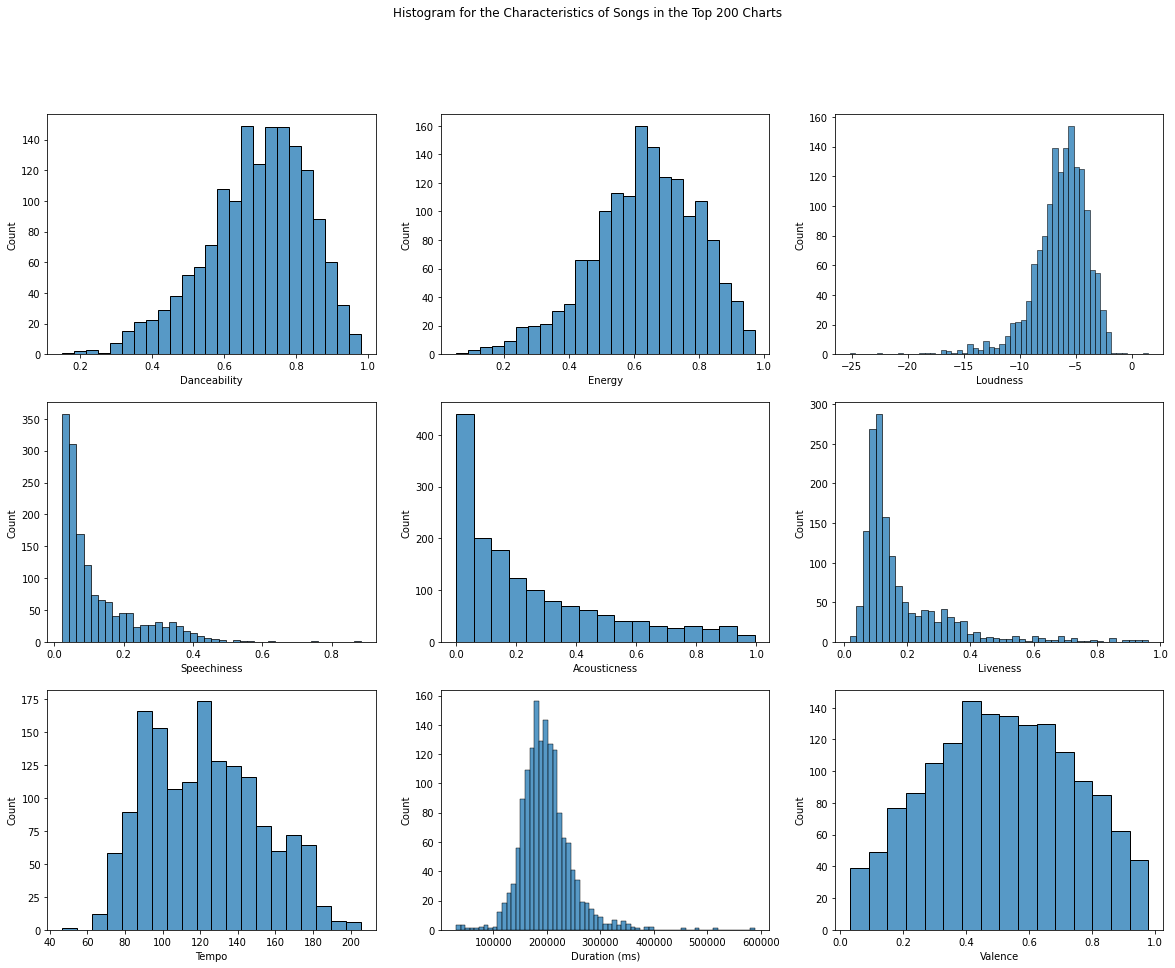

In [ ]:
# plot the fourth visualisation
fig, axes = plt.subplots(3, 3, figsize=(20, 15))

fig.suptitle('Histogram for the Characteristics of Songs in the Top 200 Charts')

i=0;
j=0;

for var in data4:
    sns.histplot(data=data4[var], ax = axes[i,j])
    if(j < 2):
        j = j + 1
    elif(j == 2):
        j = 0;
        i = i + 1 

<p align="justify">We will go through each characteristic one by one to understand the types of songs that make it to the Top 200 charts. The descriptive statistics table above the figure will also be used to provide some insights. Firstly, we look at 'Danceability' and 'Energy', which we assume should show similar distributions since both of these variables refer to the activity level and upbeatness of songs. Surely enough, 'Danceability' has a mean of 0.689997, whereas 'Energy' has a mean of 0.633495. Their distributions are also similar in that not many songs have very low values of 'Danceability' and 'Energy'. 

<p align="justify">Relating this to 'Tempo', we see that the average tempo of songs is 123 BPM, with a maximum value of 205 BPM and minimum value of 47 BPM. Higher values of beats per minute indicate that the song is faster paced. 'Tempo' looks to be approximately normally distributed, meaning that most of the songs have tempo values about the mean of 123 BPM. Based on Italian tempo indicators that indicate the tempo and mood of the music, values of 109 to 132 BPM are called 'Allegro', where the music is fast, quickly and bright. Besides that, most of the songs have a loudness of around -6 dB, portraying that many of the songs are quite loud. Here the loudness values range from -60 dB to 0dB, where 0 dB is a reference point and is the highest level possible (loudest). A mean of around -6 dB shows that the songs are 6 dB lower than the maximum possible loudness.  All four characteristics so far, namely 'Danceability', 'Energy', 'Tempo' and ' Loudness' indicate that most of the songs in the Top 200 charts are quite fast paced and loud with somewhat energetic beats.

<p align="justify">Based on the distribution of speechiness, we infer that people do not really enjoy speech-like songs as most of the songs have low speechiness values. Most songs also have low acousticness, with a mean of only 0.248695, indicating that they have mostly electric sounds such as electric guitars, auto-tuned vocals and so on. This makes sense as there are many artists well-known for their Electronic Dance Music (EDM) genre songs, such as The Chainsmokers, Calvin Harris and Avicii, just to name a few. All these artists do appear in the Top 200 Charts. Subsequently, most of the songs have low 'Liveness' values, meaning that people usually stream songs that are studio recorded instead of live performances. 

<p align="justify">The distribution of the 'Valence' variable, which indicates the positiveness of the song is normally distributed and quite symmetric about the mean. This can be proved through its mean value of 0.514704. This comes to show that people equally enjoy songs that sound positive and negative. For example, people like myself might enjoy more cheerful songs during the day to keep us going, and maybe more sad or angry songs during the night when we feel vulnerable and emotional. There is not much of a preference of positive songs over negative ones. Lastly, the 'Duration (ms)' variable shows us that most songs have a duration of around 197940.816828 ms, which is about 3.3 minutes long. Even songs played on the radio are around 3.3 minutes, as there are rarely songs that are too short or too long. However, by looking at the histogram, we notice that there is a song with a very long duration. The descriptive statistics table above tells us that the maximum 'Duration (ms)' is 588139 ms or 9.8 minutes. The code in the next cell block tells us that a song called 'SWEET / I THOUGHT YOU WANTED TO DANCE' by Tyler, The Creator, is the one with the longest duration. These are instances where even songs with long durations can make it to the Top 200 Charts. 

<p align="justify">As a conclusion, we can say that the current generation enjoys songs that are lively, fast-paced and upbeat, with no preference over the the mood conveyed, either positive or negative. Besides that, songs that are studio recorded, with less speech-like qualities around 3.3 minutes long are preferred. These are the characteristics that generally make a song more likeable by the public.


In [ ]:
# get the song with the longest duration
dataset.iloc[dataset['Duration (ms)'].argmax()]

Index                                                                      260
Highest Charting Position                                                   69
Number of Times Charted                                                      1
Week of Highest Charting                                2021-06-25--2021-07-02
Song Name                    SWEET / I THOUGHT YOU WANTED TO DANCE (feat. B...
Streams                                                                9142721
Artist                                                      Tyler, The Creator
Artist Followers                                                       6777818
Song ID                                                 3EG9FJ0ToLfgnc1IG2Z1wz
Genre                                                       ['hip hop', 'rap']
Release Date                                                        2021-06-25
Weeks Charted                                           2021-06-25--2021-07-02
Popularity                                          

###**Visualisation 5**

<p align="justify">For the final analysis section of this notebook, the dataset is first grouped by the 'Artist' column before making counts. The counts are actually to show how many songs of the artist appear in the Top 200 Charts. Since all the columns will provide the same count values, we just sort the values in descending order by 'Index' and then subset only the 'Index' column. This way, we will obtain the top 10 Artists defined by the number of their songs that appear in the Top 200 Charts. This means that an artist with more songs on the Top 200 Charts will be ranked higher than an artist with less songs on the charts for this particular analysis. After that, we will look at the scatterplots of 'Popularity' vs 'Highest Charting Position' for these 10 artists to gain insights on the relationship between the two variables. 

In [ ]:
# Group the dataset by the 'Artist' column and count the number of elements in each group. 
# The dataframe is sorted in descending order by 'Index'.
# Only the 'Index' column is subsetted.
# Get the top 10 artists using head(10)
data5 = dataset.groupby(dataset['Artist']).count()
data5 = data5.sort_values(by = 'Index', ascending=False)
data5 = data5.loc[:, ['Index']].head(10)
data5

,Index
Artist,
Taylor Swift,52
Lil Uzi Vert,32
Justin Bieber,32
Juice WRLD,30
BTS,29
Pop Smoke,29
Bad Bunny,28
Eminem,22
The Weeknd,21


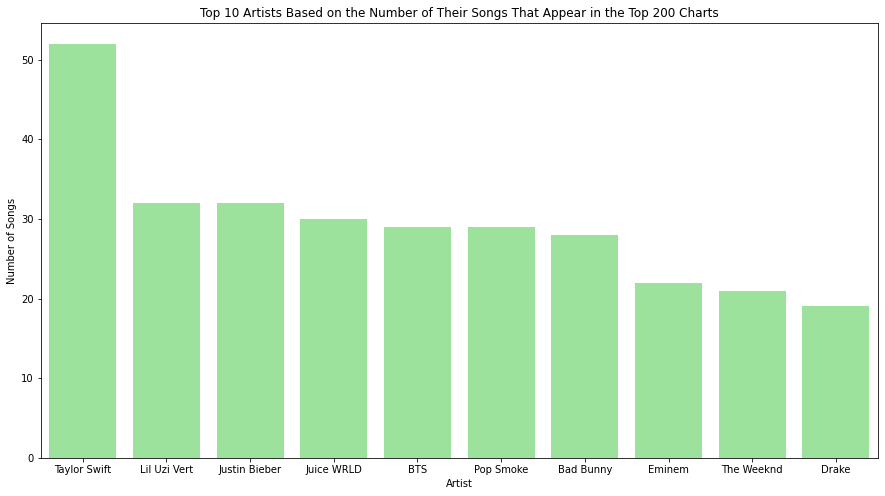

In [ ]:
# Plot a barplot for the top 10 artists based on the number of their songs that make it to the charts
plt.figure(figsize=(15,8))
fig_5 = sns.barplot(data = data5, x = data5.index, y = 'Index', color = 'lightgreen')
fig_5.set(ylabel = 'Number of Songs', title = 'Top 10 Artists Based on the Number of Their Songs That Appear in the Top 200 Charts');

<p align="justify">From the barplot above, we can see that Taylor Swift is the artist with the most number of songs appearing in the Top 200 Charts. 52 of her songs appear on the charts, followed far behind by Lil Uzi Vert and Justin Bieber, both with 32 songs each. Juice WRLD, BTS, Pop Smoke, Bad Bunny, Eminem, The Weeknd and Drake also make it in the top 10. Interestingly, Taylor Swift is the only women to make it to the list, but she tops the list with a big lead of 20 songs more than the second place. She is an amazing American singer-songwriter, very well-known for her genius lyrical capabilities and not to mention owning more awards than one can count. The fact that 52 of her songs can make it to the Top 200 Charts in the span of 84 weeks is absolutely remarkable and portrays the people's love for her music. 

Another interesting finding is that 6 of the top 10 artists listed are rappers. This shows that the rap genre of music is very widely streamed by the public. It is in line with the fact from Visualisation 4, where people enjoy faster-paced songs. Note that two of these rappers, namely Juice WRLD and Pop Smoke have already passed away in 2019 and 2020 respectively. An artist's songs will usually have more streams after they pass. According to this [article](https://www.complex.com/music/2019/12/juice-wrld-streams-jump-500-percent-following-death#:~:text=Juice%20WRLD's%20Streams%20Jump%20Almost%20500%20Percent%20Following%20Death,-ByFNR%20TIGG&text=According%20to%20BuzzAngle%20Music%2C%20this,plays%20than%20any%20other%20artist.), Juice WRLD's streams spiked around 487% following his death. Next, it is stated in this [article](https://www.highsnobiety.com/p/pop-smoke-posthumous-streams/) that Pop Smoke's streams jumped from 5 million to 24.7 million on the day he passed. The best way fans can commemorate their deaths is by keeping their music alive. 

<p align="justify">The top 10 artists above hail from different countries and they are listed down in the table below for reference purposes.

| Artist                 | Description of Artist|
|----------                |:-------------|
|Taylor Swift| American singer-songwriter (34 years old) |
|Lil Uzi Vert| American rapper (28 years old)|
|Justin Bieber|Canadian singer (29 years old)|
|Juice WRLD|American rapper (passed away in December 2019)|
|BTS|South Korean boy band (formed in 2010)|
|Pop Smoke|American rapper (passed away in February 2020)|
|Bad Bunny|Puerto Rican rapper (29 years old)|
|Eminem|American rapper (51 years old)|
|The Weeknd|Canadian singer (33 years old)|
|Drake|Canadian rapper (37 years old)|

![picture](https://drive.google.com/uc?export=view&id=1o6KETg40HhedWzghTwvE1wGb6DA01M6C)





In [ ]:
# Subset the dataset to only include the top 10 artists
data6 = dataset.loc[dataset['Artist'].isin(data5.index)]

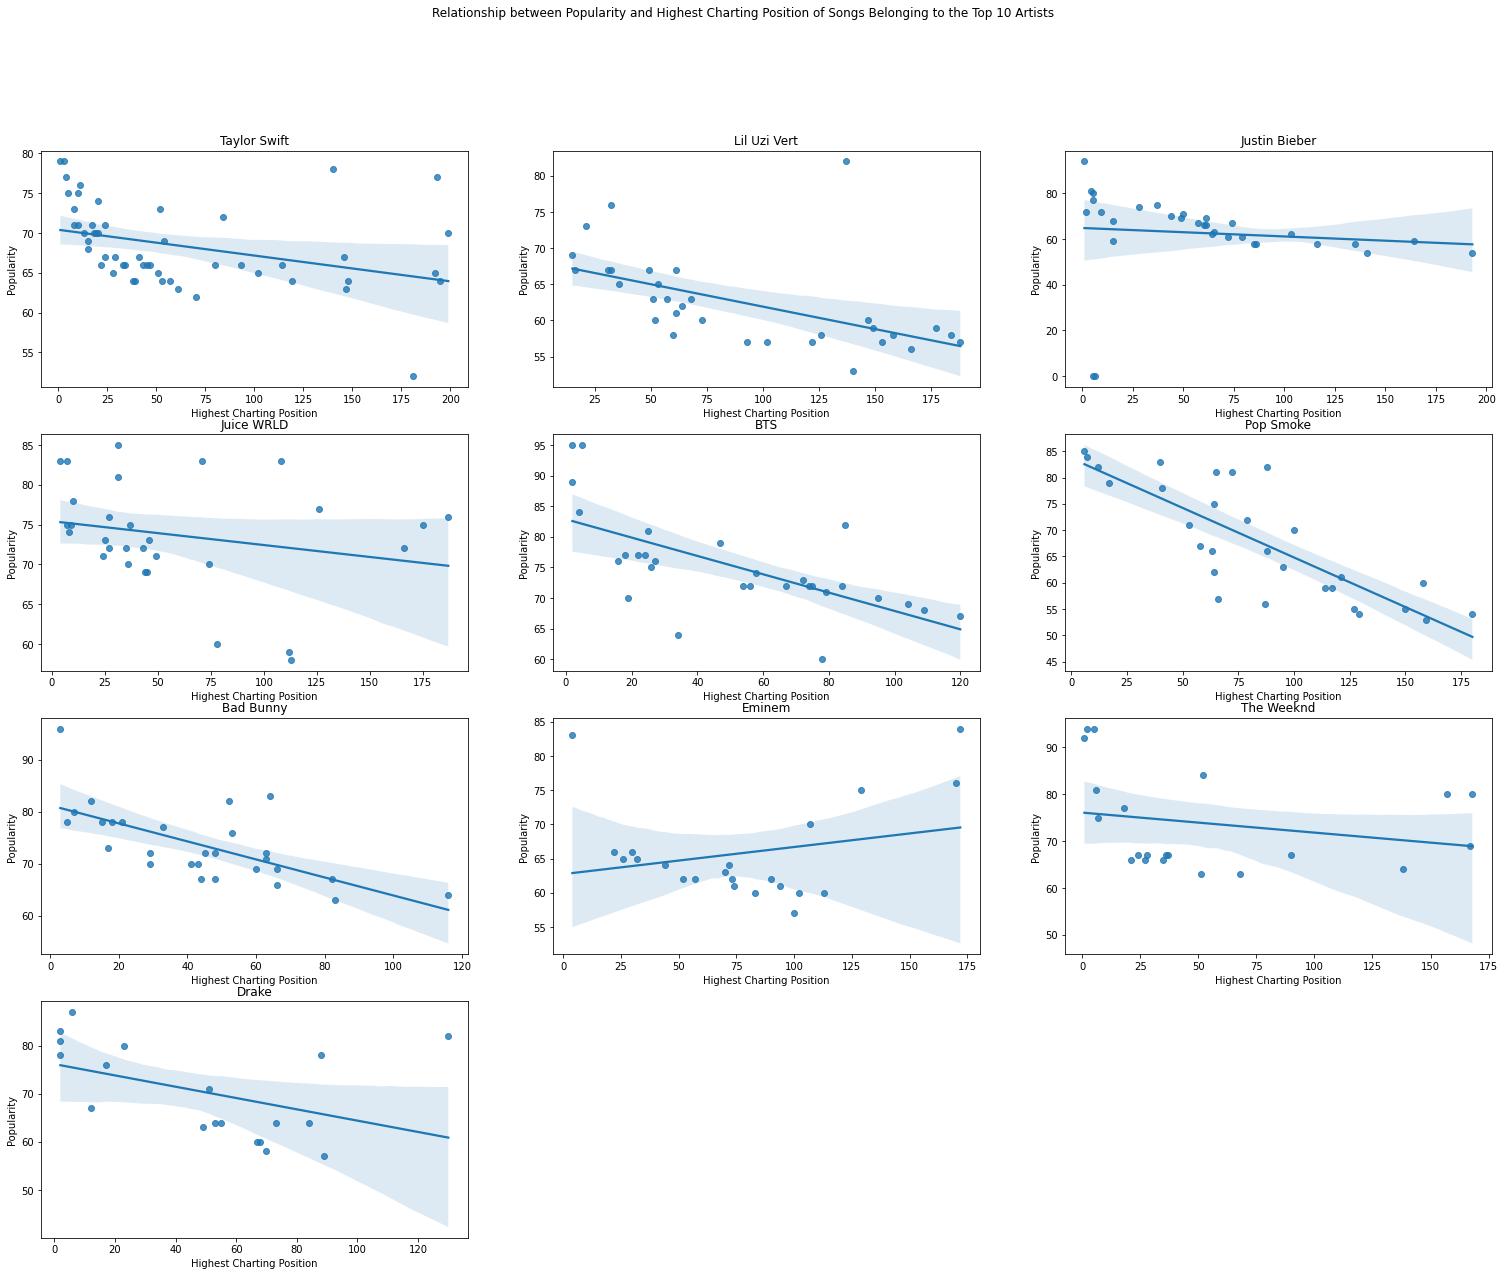

In [ ]:
# plot the final visualisation involving 10 scatterplots
fig, axes = plt.subplots(4, 3, figsize=(26, 20))

fig.suptitle('Relationship between Popularity and Highest Charting Position of Songs Belonging to the Top 10 Artists')

i=0;
j=0;

# use a for loop to plot a scatterplot for each artist
# data5.index gives the top 10 artists' names
for artist in data5.index:
    fig_6 = data6.loc[dataset['Artist'] == artist]
    sns.regplot(data = fig_6, x = 'Highest Charting Position', y = 'Popularity', ax = axes[i,j]).set(title = artist)
    plt.title(artist)
    if(j < 2):
        j = j + 1
    elif(j == 2):
        j = 0;
        i = i + 1 

# remove the two empty subplots created
fig.delaxes(axes[3][1])
fig.delaxes(axes[3][2])

<p align="justify">Moving on, we want to observe if 'Popularity' depends on the 'Highest Charting Position' for songs belonging to the top 10 artists listed previously. Scatterplots are plotted for each artist to see if there are similar patterns across artists. We would expect that the higher the charting position of the song, the higher its popularity. This is exactly what the scatterplots and regression lines show us. To avoid confusion, note that a higher charting moves to the left of the plot, whereas a lower charting moves to the right of the plot.

<p align="justify">We observe that most of Taylor Swift's songs are ranked from 1 to around 75. The songs ranked the highest have high popularity values of nearly 80, whereas the popularity decreases for songs at a lower charting position. It is not always the case though as some songs ranked almost in the 200th position have higher popularity values than other songs that are ranked higher. All the other artists show downward slopes too, except for Eminem. However, if you were to look at the points for Eminem's plot more closely, the points do slope downwards except for the four songs at the right-end of the plot that show higher popularities as the charting position is lower. His song at position 172 has a higher popularity than his highest charting song. It is then revealed that his song, 'The Real Slim Shady' (highest charting position of 172), released in May 2000 has a higher popularity of 84, than 'Godzilla' (highest charting position of 4) released in January 2020 with a popularity of 83. The length of time a song has been in the industry can also play a role in determining its popularity as people tend to regard some songs as 'classic' or 'legendary'. These songs might not be charted in such high positions since they have been released a long time ago, unless there is an event that triggers the streaming of the song widely. All the values stated for the scatterplots can be obtained by converting the dataframe in the next cell block into an interactive table and then do some filtering.

<p align="justify">Of all 10 artists, Pop Smoke has the steepest slope, indicating that the popularity of his songs decrease a lot as the charting position goes lower. Also noteworthy, out of the 10 artists, only BTS, Bad Bunny and The Weeknd have songs with popularity values over 90. 

<p align="justify">Similar to the findings from Visualisation 2, we find that the 'Highest Charting Position' of a song is important in determining its success. The higher the charting position of a song, the higher is its popularity in general. This of course makes sense since a song that is more popular would most likely be streamed often, thus increasing its charting position. It is the dream and goal of every artist for their songs to make it to the highest spots in a chart. 

In [ ]:
data6

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord,Start Date,End Date
8,9,3,8,2021-06-18--2021-06-25,Yonaguni,25030128,Bad Bunny,36142273,2JPLbjOn0wPCngEot2STUS,"['latin', 'reggaeton', 'trap latino']",...,-4.601,0.1180,0.27600,0.1350,179.951,206710,0.440,C#/Db,2021-06-18,2021-06-25
12,13,5,3,2021-07-09--2021-07-16,Permission to Dance,22062812,BTS,37106176,0LThjFY2iTtNdd4wviwVV2,"['k-pop', 'k-pop boy group']",...,-5.330,0.0427,0.00544,0.3370,124.925,187585,0.646,A,2021-07-09,2021-07-16
13,14,1,19,2021-04-02--2021-04-09,Peaches (feat. Daniel Caesar & Giveon),20294457,Justin Bieber,48504126,4iJyoBOLtHqaGxP12qzhQI,"['canadian pop', 'pop', 'post-teen pop']",...,-6.181,0.1190,0.32100,0.4200,90.030,198082,0.464,C,2021-04-02,2021-04-09
14,15,2,10,2021-05-21--2021-05-28,Butter,19985713,BTS,37106176,2bgTY4UwhfBYhGT4HUYStN,"['k-pop', 'k-pop boy group']",...,-5.187,0.0948,0.00323,0.0906,109.997,164442,0.695,G#/Ab,2021-05-21,2021-05-28
17,18,5,14,2021-04-23--2021-04-30,Save Your Tears (with Ariana Grande) (Remix),18053141,The Weeknd,35305637,37BZB0z9T8Xu7U3e65qxFy,"['canadian contemporary r&b', 'canadian pop', ...",...,-4.645,0.0325,0.02150,0.0936,118.091,191014,0.593,C,2021-04-23,2021-04-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1489,1500,100,1,2020-01-17--2020-01-24,Alfred - Interlude,8030151,Eminem,46814751,4EmunTy7kNBYQivOa8F6b8,"['detroit hip hop', 'hip hop', 'rap']",...,-20.430,0.4020,0.87800,0.2790,74.545,30133,0.914,F,2020-01-17,2020-01-24
1490,1501,102,1,2020-01-17--2020-01-24,Little Engine,7913461,Eminem,46814751,4qNWEOMyexn7b8Icyk29t9,"['detroit hip hop', 'hip hop', 'rap']",...,-4.162,0.2280,0.02340,0.0451,155.081,177293,0.760,A#/Bb,2020-01-17,2020-01-24
1491,1502,113,1,2020-01-17--2020-01-24,"I Will (feat. KXNG Crooked, Royce Da 5'9"" & Jo...",7115414,Eminem,46814751,3CJbxqRQ0JNCqboWDNUUeX,"['detroit hip hop', 'hip hop', 'rap']",...,-5.941,0.0670,0.04540,0.2720,98.743,303000,0.036,G#/Ab,2020-01-17,2020-01-24
1538,1550,187,1,2019-12-27--2020-01-03,Let Me Know (I Wonder Why Freestyle),4701532,Juice WRLD,19102888,3wwo0bJvDSorOpNfzEkfXx,"['chicago rap', 'melodic rap']",...,-7.895,0.0832,0.17200,0.4180,125.028,215381,0.383,G,2019-12-27,2020-01-03


##**Conclusion**

<p align="justify">Many interesting findings were obtained from the Exploratory Data Analysis carried out on the Spotify Top 200 Charts (2020-2021) dataset. The significant findings are highlighted in this section as a closure. First of all, the sum of streams for songs show seasonality, where during specific holiday seasons, the number of streams peak much higher than normal. Some external events could cause certain songs to gain more attention, causing high jumps in the number of streams as well. An example would be the promotion or release of a music video. Next, it is very important to note that the 'Highest Charting Position' of a song is very influential on the number of streams and also popularity. However, to be charted in the first five spots would require a song to have exponentially higher streams than to be charted in the 100th spot. It is a huge success and prestige to be in the top 5 charting positions. It should be the goal of every artist who wishes to increase the exposure of their songs and gain more fame. 

<p align="justify">It is also worth noting that it is much easier for songs to be charted for a few number of weeks than it is for them to stay on the charts for a long time. Being on the charts for one week is also counted for the song to be listed in the Top 200 Charts. This suggests that not all songs in the Top 200 Charts can be treated as equals. Some are more successful than others in terms of having higher streams or popularity. Careful observations would need to be done before making an assumption about the success of a certain song. 

<p align="justify">It is of utmost importance for artists and labels to be aware of the characteristics of songs that are trending and consumed most frequently by the public. People seem to prefer energetic, upbeat, fast-paced and livelier songs with low acousticness that are studio recorded. Songs with positive or negative moods are loved equally as long as the length of the songs are not too long and not too short, ideally around 3.3 minutes. 

<p align="justify">This report can help us to understand streaming patterns besides the importance and benefits of songs in being ranked the best of the best. It also helps us to comprehend the success of songs based on the disparity of their charting positions. The characteristics of trending songs have also been inferred for further action to be taken by relevant parties. Even during social functions, songs with characteristics generally fancied could be played to capture and hold the attention of the participants, ensuring that most of them have a good time. Nevertheless, everyone has different music tastes, but the findings of these report can attain to what is observed in the general public of Spotify users. 

###**Acknowledgements**

<p align="justify">Harris, M., Liu, B., Park, C., Ramireddy, R., Ren, G., Ren, M., Yu, S., Daw, A. & Pender, J. 2019. Analyzing the Spotify Top 200 Through a Point Process Lens. http://arxiv.org/abs/1910.01445 [17 January 2023].
 

I would like to acknowledge the [paper](https://arxiv.org/abs/1910.01445) above as a main reference in writing this report. I was inspired by the EDA carried out by the authors on the daily record of the Top 200 playlist on Spotify from 1 January 2017 to 12 September 2018. Certain analyses in this report are similar to the ones in the paper as I tried to code it out on my own, but readers can get a more in depth analysis of 2017 to 2018 hits by reading the paper.